In [1]:
import pandas as pd
import matplotlib
import sys
# print(sys.argv[1])
df = pd.read_csv('threads_3_log.csv') 
# print(df.groupby(['total_log_yes (in us)','num_log_yes']).mean().reset_index())

COMMIT_ALG          ONE_PC  TWO_PC
NUM_SERVER_THREADS                
2                      inf     inf
4                      inf     inf
8                      inf     inf
16                     inf     inf
32                     inf     inf
64                     inf     inf
128                    inf     inf


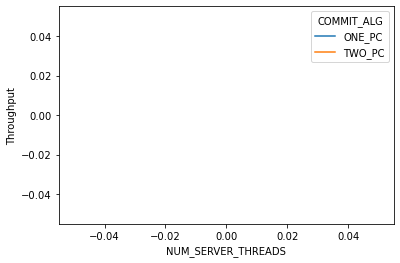

In [2]:
grouped = df.groupby(['COMMIT_ALG', 'NUM_SERVER_THREADS'])
newdf = grouped['Throughput'].mean().reset_index()
newdf = newdf.pivot(index='NUM_SERVER_THREADS', columns='COMMIT_ALG', values='Throughput')
print(newdf)
plot = newdf.plot()
plot.set_ylabel("Throughput")
fig = plot.get_figure()
fig.savefig("threads_zipf0_std.png")


In [4]:
latency = grouped['time_debug1 (in us)', 'time_debug6 (in us)'].mean().reset_index()
result = latency[latency['NUM_SERVER_THREADS'] == 16]

<ipython-input-4-554a220f77c7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  latency = grouped['time_debug1 (in us)', 'time_debug6 (in us)'].mean().reset_index()


   COMMIT_ALG  NUM_SERVER_THREADS  time_debug1 (in us)  time_debug6 (in us)
3      ONE_PC                  16             16893.80             21713.22
10     TWO_PC                  16             16774.42             22357.50


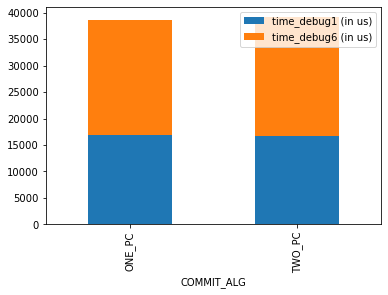

In [5]:
print(result)
result = result.drop(['NUM_SERVER_THREADS'], axis=1)
latency_plot = result.plot.bar(stacked='True', x='COMMIT_ALG')
fig = latency_plot.get_figure()
fig.savefig("latency_zipf09_std.png")